In [4]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

In [1]:
!pip install TTS

In [4]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.26.4 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
gradio 4.31.4 requires typer<1.0,>=0.12; sys_platform != "emscripten", but you have typer 0.9.4 which is incompatible.


In [ ]:
# !pip install --upgrade transformers accelerate
#!pip install py-espeak-ng
#!pip install phonemizer

In [1]:
# -*- coding: utf-8 -*-
"""helper.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/14SxQYX2LPiVdEAxty7Vk4h-UjuTKUOld
"""

import io
import matplotlib.pyplot as plt
import requests
import inflect
from PIL import Image

def load_image_from_url(url):
    return Image.open(requests.get(url, stream=True).raw)

def render_results_in_image(in_pil_img, in_results):
    plt.figure(figsize=(16, 10))
    plt.imshow(in_pil_img)

    ax = plt.gca()

    for prediction in in_results:

        x, y = prediction['box']['xmin'], prediction['box']['ymin']
        w = prediction['box']['xmax'] - prediction['box']['xmin']
        h = prediction['box']['ymax'] - prediction['box']['ymin']

        ax.add_patch(plt.Rectangle((x, y),
                                   w,
                                   h,
                                   fill=False,
                                   color="green",
                                   linewidth=2))
        ax.text(
           x,
           y,
           f"{prediction['label']}: {round(prediction['score']*100, 1)}%",
           color='red'
        )

    plt.axis("off")

    # Save the modified image to a BytesIO object
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png',
                bbox_inches='tight',
                pad_inches=0)
    img_buf.seek(0)
    modified_image = Image.open(img_buf)

    # Close the plot to prevent it from being displayed
    plt.close()

    return modified_image

def summarize_predictions_natural_language(predictions):
    summary = {}
    p = inflect.engine()

    for prediction in predictions:
        label = prediction['label']
        if label in summary:
            summary[label] += 1
        else:
            summary[label] = 1

    result_string = "In this image, there are "
    for i, (label, count) in enumerate(summary.items()):
        count_string = p.number_to_words(count)
        result_string += f"{count_string} {label}"
        if count > 1:
          result_string += "s"

        result_string += " "

        if i == len(summary) - 2:
          result_string += "and "

    # Remove the trailing comma and space
    result_string = result_string.rstrip(', ') + "."

    return result_string


##### To ignore warnings #####
import warnings
import logging
from transformers import logging as hf_logging

def ignore_warnings():
    # Ignore specific Python warnings
    warnings.filterwarnings("ignore", message="Some weights of the model checkpoint")
    warnings.filterwarnings("ignore", message="Could not find image processor class")
    warnings.filterwarnings("ignore", message="The `max_size` parameter is deprecated")

    # Adjust logging for libraries using the logging module
    logging.basicConfig(level=logging.ERROR)
    hf_logging.set_verbosity_error()



In [2]:
from transformers import pipeline
from PIL import Image

In [3]:
pipe = pipeline(task = "object-detection", model = "facebook/detr-resnet-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing D

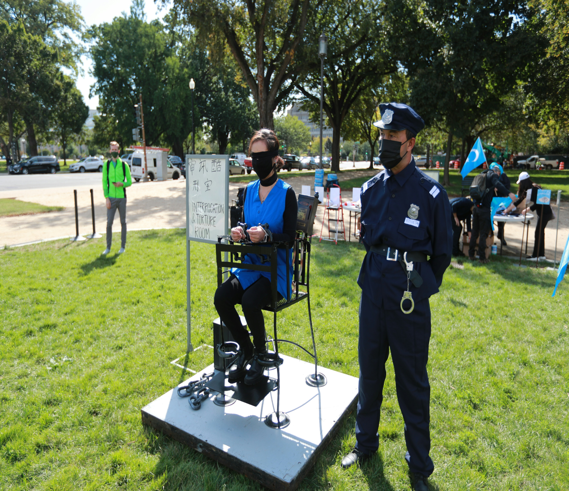

In [4]:
image_resize = Image.open("/content/sample_data/kuzzat-altay-AThSt37qAKE-unsplash.jpg")
image_resize.resize((569, 491))

In [5]:
pip_output = pipe(image_resize)

In [6]:
pip_output

[{'score': 0.9343286156654358,
  'label': 'car',
  'box': {'xmin': 2846, 'ymin': 1154, 'xmax': 3023, 'ymax': 1258}},
 {'score': 0.9123506546020508,
  'label': 'person',
  'box': {'xmin': 4329, 'ymin': 1467, 'xmax': 4535, 'ymax': 1890}},
 {'score': 0.989788293838501,
  'label': 'person',
  'box': {'xmin': 4490, 'ymin': 1205, 'xmax': 4958, 'ymax': 1932}},
 {'score': 0.9327260851860046,
  'label': 'person',
  'box': {'xmin': 4797, 'ymin': 1271, 'xmax': 5154, 'ymax': 1906}},
 {'score': 0.9908055663108826,
  'label': 'truck',
  'box': {'xmin': 1164, 'ymin': 1113, 'xmax': 1701, 'ymax': 1355}},
 {'score': 0.9912812113761902,
  'label': 'car',
  'box': {'xmin': 637, 'ymin': 1159, 'xmax': 1011, 'ymax': 1284}},
 {'score': 0.9921423196792603,
  'label': 'car',
  'box': {'xmin': 71, 'ymin': 1156, 'xmax': 570, 'ymax': 1304}},
 {'score': 0.9706070423126221,
  'label': 'car',
  'box': {'xmin': 2197, 'ymin': 1159, 'xmax': 2380, 'ymax': 1281}},
 {'score': 0.9126750230789185,
  'label': 'car',
  'box': 

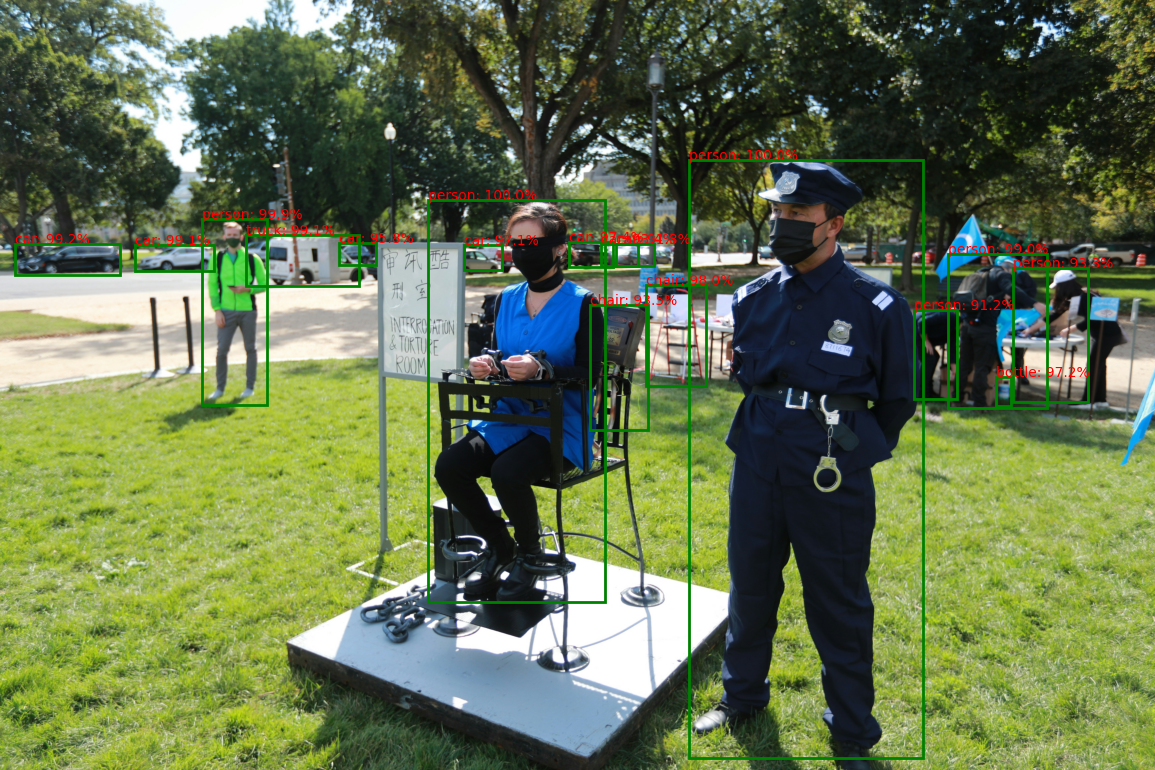

In [7]:
preprocess_image = render_results_in_image(image_resize, pip_output)
preprocess_image

In [8]:
text = summarize_predictions_natural_language(pip_output)
text

'In this image, there are seven cars six persons one truck one bottle and two chairs.'

In [9]:
# from transformers import AutoProcessor, AutoModel

# processor = AutoProcessor.from_pretrained("suno/bark")
# model = AutoModel.from_pretrained("suno/bark")

In [10]:
# inputs = processor(
#     text=text,
#     return_tensors="pt",
# )

# speech_values = model.generate(**inputs, do_sample=True)


In [11]:
# from IPython.display import Audio

# sampling_rate = model.generation_config.sample_rate
# Audio(speech_values.cpu().numpy().squeeze(), rate=sampling_rate)


In [13]:
from TTS.api import TTS
tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2")

# generate speech by cloning a voice using default settings
tts.tts_to_file(text=text,
                file_path="output.wav",
                speaker_wav="/content/sample_data/OSR_us_000_0010_8k.wav",
                language="en")

 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
 > Text splitted to sentences.
['In this image, there are seven cars six persons one truck one bottle and two chairs.']
 > Processing time: 74.08083295822144
 > Real-time factor: 6.51724531889875


'output.wav'

In [14]:
import gradio as gr
from TTS.api import TTS
from PIL import Image

# Ensure these functions are defined or imported properly
# from your_module import pipe, render_results_in_image, summarize_predictions_natural_language


def get_pipeline_prediction(pil_image):
    # Assuming pipe, render_results_in_image, and summarize_predictions_natural_language are defined
    pipeline_output = pipe(pil_image)

    processed_image = render_results_in_image(pil_image, pipeline_output)
    text = summarize_predictions_natural_language(pipeline_output)

    audio_file_path = "output.wav"
    tts.tts_to_file(text=text,
                    file_path=audio_file_path,
                    speaker_wav="/content/sample_data/OSR_us_000_0010_8k.wav",
                    language="en")
    return processed_image, audio_file_path

demo = gr.Interface(
    fn=get_pipeline_prediction,
    inputs=gr.Image(label="Input image", type="pil"),
    outputs=[gr.Image(label="Output image with predicted instances", type="pil"),
             gr.Audio(label="Generated audio", type="filepath")]
)

demo.launch()


 > tts_models/multilingual/multi-dataset/xtts_v2 is already downloaded.
 > Using model: xtts
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://50d704dbba1d1c6d1a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
